In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from snAPI.Main import *
import pandas as pd
sys.path.append("../")
from HH import HH_T3
from Functions import *

In [2]:
def GetPos(filename):
    parts=filename[:-4].split('_')
    x=float(parts[1])
    y=float(parts[2])
    return x,y
def GetGatedCounts(filename,T):
    sn.getDevice()
    sn.getFileDevice(filename)
    sn.initDevice(MeasMode.T3)
    t_resol=sn.deviceConfig['Resolution']/1000 #in ns
    sn.raw.measure()
    data = sn.raw.getData()
    channels=sn.raw.channel(data)
    dTimes=sn.raw.dTime_T3(data)[np.where(channels==3)]*t_resol
    sn.closeDevice()
    print(dTimes)
    return np.size(dTimes)

In [3]:
def ImageData(pathtoPTUs,gate):
    arr=np.array([0,0,0])
    for file in os.listdir(pathtoPTUs):
        if file[0:3]=='PTU':
            x,y=GetPos(file)
            print(file)
            c=GetGatedCounts(pathtoPTUs+file,gate)
            print(c)
            arr=np.vstack((arr,[x,y,c]))
    arr=np.delete(arr,0,0)
    return arr

In [14]:
filename='../../../Acquisition2/Data/QD1e-4_large/PTU_-0.51_-0.51.ptu'
os.listdir(filename)

NotADirectoryError: [WinError 267] El nombre del directorio no es válido: '../../../Acquisition2/Data/QD1e-4_large/PTU_-0.51_-0.51.ptu'

In [15]:
sn=snAPI()

In [16]:
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T3)
t_resol=sn.deviceConfig['Resolution']/1000 #in ns
sn.raw.measure()
data= sn.raw.getData()

sn.closeDevice()

MemoryError: 

In [11]:
sn.closeDevice()

In [7]:
data

array([4261413061,   67160750, 4261412934,   67426831, 4261412995,
         67250897, 4261412961,   67366161, 4261412914,   67397721,
       4261412881,   67390234, 4261412940,   67259407, 4261412906,
         67416002, 4261413160], dtype=uint32)

In [ ]:
plt.plot(data[3])

In [15]:
pathtoPTUs='../../../Acquisition2/Data/QD1e-4_large/'
os.listdir(filename)

NotADirectoryError: [WinError 267] El nombre del directorio no es válido: '../../../Acquisition2/Data/QD1e-4_large/PTU_-0.51_-0.51.ptu'

In [16]:
#os.listdir('../../../Acquisition/Acquisition2/Data/Trial/')

In [17]:
d=ImageData(pathtoPTUs,0)

PTU_-0.51_-0.51.ptu


MemoryError: 

In [11]:
d.T[2]

array([300207., 302535., 300327., 299634., 298874., 302236., 302575.,
       300608., 297203., 299257., 303969., 304191., 298571., 301568.,
       302800., 299383., 299494., 302376., 295130., 302369., 304435.,
       302439., 299869., 305729., 299857., 302595., 301336., 304101.,
       302869., 303362., 295404., 297870., 299998., 294790., 299616.,
       297162., 297757., 295152., 295011., 290369., 300780., 299852.,
       299558., 300396., 289442., 302962., 301846., 298228., 303016.,
       298943., 293069., 294151., 292001., 286515., 290875., 284727.,
       293079., 289798., 289907., 285787., 288655., 288320., 282768.,
       281133., 283908., 291591., 291439., 284109., 290489., 288338.,
       287477., 284584., 285249., 280529., 287620., 288509., 286163.,
       279302., 287203., 284565., 294247., 291100., 294535., 286307.,
       294645., 291126., 290321., 293582., 294877., 292558., 279585.,
       279299., 275506., 280723., 274186., 279876., 281414., 280132.,
       282206., 2827

In [12]:
xs=np.unique(d.T[0])
ys=np.unique(d.T[1])
m=np.zeros((np.size(xs),np.size(ys)))
for point in d:
    ind_x=np.where(xs==point[0])[0][0]
    ind_y=np.where(ys==point[1])[0][0]
    m[ind_x,ind_y]=point[2]   

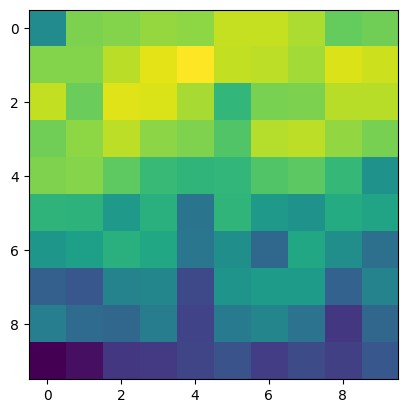

In [13]:
plt.imshow(m)